# Exploratory data analysis on Imbruvica data

For each prescriber and drug, the dataset includes the total number of prescriptions that were dispensed (including original prescriptions and any refills), total 30-day standardized fill counts, total day’s supply for these prescriptions, and the total drug cost. To protect the privacy of Medicare beneficiaries, any aggregated records which are derived from 10 or fewer claims are excluded from the Part D Prescriber PUF.


bene_count_ge65 – The total number of unique Medicare Part D beneficiaries age 65 and older with at least one claim for the drug. A blank indicates the value is suppressed. See bene_count_ge65_suppress_flag regarding suppression of data.


**bene_count_ge65_suppress_flag** – A flag indicating the reason the bene_count_ge65 variable is suppressed.

    “*” = Primary suppressed due to bene_count_ge65 between 1 and 10.
    “#” = Counter suppressed because the “less than 65 year old” group (not explicitly displayed)
    contains a beneficiary count between 1 and 10, which can be mathematically determined from bene_count_ge65 and bene_count.
    
total_claim_count_ge65 – The number of Medicare Part D claims for beneficiaries age 65 and older. This includes original prescriptions and refills. A blank indicates the value is suppressed. See ge65_suppress_flag regarding suppression of data.

In [10]:
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
imbruvica = pd.read_csv('data/partd_imbruvica_2016.txt', delimiter='\t')
cols = pd.read_csv('data/CMS_PartD_Prescriber_NPI_Drug_CY2016_100.txt', delimiter='\t').columns
imbruvica.columns = cols
imbruvica.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003051871,POPALZAI,MUHAMMAD,CARTERVILLE,IL,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,15.0,450,126933.23,NaN,*,15.0,NaN,15.0,450.0,126933.23
1,1003058454,DEAFENBAUGH,LUANN,WARSAW,IN,Nurse Practitioner,S,IMBRUVICA,IBRUTINIB,NaN,...,15.0,450,110868.32,NaN,*,NaN,*,NaN,NaN,NaN
2,1003067455,FENG,YAN,CLEVELAND,OH,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,23.0,690,231135.61,NaN,*,19.0,NaN,23.0,690.0,231135.61
3,1003131640,CHINTAPATLA,RANGASWAMY,KENNEWICK,WA,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,25.0,720,244390.09,NaN,*,25.0,NaN,25.0,720.0,244390.09
4,1003804287,VILLAR,MARY JO,HIALEAH,FL,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,11.0,330,148331.63,NaN,*,11.0,NaN,11.0,330.0,148331.63


In [6]:
imbruvica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 21 columns):
npi                              3314 non-null int64
nppes_provider_last_org_name     3314 non-null object
nppes_provider_first_name        3314 non-null object
nppes_provider_city              3314 non-null object
nppes_provider_state             3314 non-null object
specialty_description            3314 non-null object
description_flag                 3314 non-null object
drug_name                        3314 non-null object
generic_name                     3314 non-null object
bene_count                       103 non-null float64
total_claim_count                3314 non-null int64
total_30_day_fill_count          3314 non-null float64
total_day_supply                 3314 non-null int64
total_drug_cost                  3314 non-null float64
bene_count_ge65                  85 non-null float64
bene_count_ge65_suppress_flag    3229 non-null object
total_claim_count_ge65         

In [11]:
imbruvica.describe()

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,3.314000e+03,103.000000,3314.000000,3314.000000,3314.000000,3.314000e+03,85.000000,2780.000000,2780.000000,2780.000000,2.780000e+03
mean,1.499210e+09,15.368932,25.081171,25.242456,753.882921,2.425873e+05,6.905882,23.263669,23.410036,699.373381,2.246615e+05
std,2.878224e+08,6.103664,19.408155,19.599784,586.550452,1.859042e+05,7.389864,17.157859,17.270114,516.571301,1.656550e+05
min,1.003052e+09,11.000000,11.000000,11.000000,147.000000,1.774713e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.245415e+09,11.000000,13.000000,13.000000,390.000000,1.300060e+05,0.000000,13.000000,13.000000,390.000000,1.239504e+05
50%,1.497855e+09,13.000000,19.000000,19.000000,570.000000,1.889570e+05,11.000000,18.000000,18.000000,540.000000,1.770564e+05
75%,1.740622e+09,17.000000,29.000000,30.000000,883.750000,2.870963e+05,12.000000,28.000000,28.000000,840.000000,2.718749e+05
max,1.992999e+09,51.000000,283.000000,303.000000,9086.000000,2.139523e+06,31.000000,236.000000,236.000000,7074.000000,2.091627e+06


In [27]:
imbruvica['bene_count'].dropna().count()

103

In [120]:
npi = pd.read_csv('data/PartD_Prescriber_PUF_NPI_16_100.txt', delimiter='\t')

imbruvica = pd.read_csv('data/imbruvica_prescrib_npi_summary.csv', delimiter='\t')
duplicate_cols = ['npi.1', 
                  'nppes_provider_last_org_name.1', 
                  'nppes_provider_first_name.1', 
                  'nppes_provider_city.1', 
                  'nppes_provider_state.1', 
                  'specialty_description.1', 
                  'description_flag.1', 
                  'total_claim_count.1',
                  'total_30_day_fill_count.1',
                  'total_drug_cost.1', 
                  'total_day_supply.1', 
                  'bene_count.1', 
                  'ge65_suppress_flag.1', 
                  'total_claim_count_ge65.1', 
                  'total_30_day_fill_count_ge65.1', 
                  'total_drug_cost_ge65.1', 
                  'total_day_supply_ge65.1', 
                  'bene_count_ge65_suppress_flag.1', 
                  'bene_count_ge65.1']
imbruvica.drop(duplicate_cols, axis=1, inplace=True)
imbruvica.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1033101068,MARQUES BIBILONI,JOSE,SANTURCE,PR,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,38.0,0.0,NaN,0.0,NaN,0.0,0.0,82.0,0.0,2.3657
1,1114922432,OYOLA,RAUL,MARIETTA,GA,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,89.0,196.0,38.0,NaN,NaN,0.0,NaN,215.0,37.0,1.9098
2,1073841938,BRAY,LISA,MILWAUKEE,WI,Nurse Practitioner,S,IMBRUVICA,IBRUTINIB,NaN,...,57.0,NaN,NaN,NaN,NaN,0.0,NaN,134.0,21.0,2.0907
3,1194784207,WEINSHEL,ERIC,EDINA,MN,Medical Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,67.0,NaN,NaN,NaN,0.0,NaN,NaN,168.0,12.0,1.9519
4,1134116262,TAI,MUHAMMAD,REXFORD,NY,Medical Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,80.0,206.0,NaN,NaN,NaN,0.0,NaN,172.0,60.0,1.9718


In [72]:
imbruvica.shape

(3315, 86)

In [155]:
imbruvica['brand_claim_count'].isnull().sum()

1251

In [172]:
imbruvica['nppes_credentials'].value_counts()

MD                      2787
NP                       155
MD plus                   82
DO                        49
D.O.                      46
PAC                       42
PA                        20
APRN                       7
Other                      6
APN                        5
RN                         5
RPA-C                      5
RPAC                       3
PHARMD                     2
ANP-BC                     2
D.O                        2
APRN-BC                    2
MSN, CRNP                  2
PHARM.D.                   2
CFNP                       2
ANPC                       1
RN, BSN, MSN               1
M.D., FACP                 1
MBBS, MRCP                 1
PH.D., D.O.                1
RN, AGACNP                 1
M.D.,PH.D.                 1
MSN, RN, ANP-BC            1
M.S., P.A.-C               1
MS, APRN, BC, AOCN         1
PHARM.D                    1
RN, MS, ANP-BC, ADCN       1
MSN, CRNP, OCN             1
AGNP                       1
BSN           

In [171]:
# Collapse variables in nppes_credentials
mds = ['M.D.', 'M.D', 'M. D.', 'MD.',  'M.D.,', 'M.D.,']
mds_plus = ['MD, PHD', 'M.D., PH.D.', 'M.D., PHD', 'MD PHD', 'MD, FACP', 'M.D., PH.D', 'M.D., M.S(MOL BIO)', 'MD, PHD.', 'M.D., F.A.C.P.', 'M.D., PH. D.', 'M.D., M.P.H.', 'M.D./PH.D', 'M.D. F.A.C.P', 'M.D., M.P.H', 'M.D., M.S.,', 'M.D., M.S.', 'MD, MPH', 'M.D. PHD', 'M.D./PH.D.', 'M.D. PHD', 'MD, MPH, FACP', 'M.D. PHD', 'MD FACP', 'M.D, PHD', 'MD,MPH', 'PHD,MD,FACP', 'MD, MBA', 'MD, CM', 'M.D, MRCP', 'MD,FACP', 'MD  FACP', 'MD PC', 'M.D.,M.B.A.', 'MD DPHIL', 'MD,PHD', 'M.D,']
nps = ['CRNP', 'N.P.', 'ARNP', 'FNP', 'CNP', 'NP-C', 'NURSE PRACTITIONER', 'ANP', 'FNP-BC', 'ACNP-BC', 'ACNP', 'AOCNP, ACNP/FNP-BC', 'RN, AOCNS, NP', 'NP, MS', 'RN,BSN,OCN,NP', 'C.R.N.P.', 'RN MN ANP AOCN', 'F.N.P.', 'APNP', 'APRN BC', 'ANP, FNP', 'ACNP RN', 'RN, MS, NP', 'RN MSN ACNP-BC', 'MSN, RN, NP-C', 'RN, NP', 'APNP','ANP, GNP-BC', 'RN, ANP', 'MSN, NP', 'FNP-C', 'M.S.N., O.N.P.', 'ANP-B C', 'MSN, ACNP-BC', 'FNP-BC, AOCNP', 'RN, MSN, FNP', 'RN  MS  FNP', 'R.N., N.P.']
rns = ['R.N.', 'RN, ACNP-BC', 'RN, APN-C']
pas = ['PA-C', 'P.A.', 'PAC', 'P.A.-C', 'PA C']
other_creds = ['MB CHB, FCP ( SA )', 'MB, BCH', 'MBBS']
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(mds)] = 'MD'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(mds_plus)] = 'MD plus'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(nps)] = 'NP'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(rns)] = 'RN'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(pas)] = 'PAC'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(other_creds)] = 'Other'

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/mattheweng/anaconda/lib/

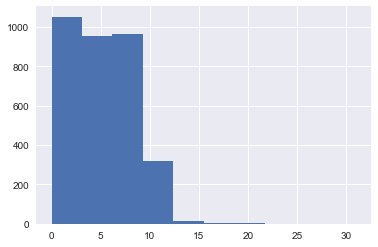

In [147]:
imbruvica['bene_count_ge65'].hist()

In [144]:
specialties_other = ['Pharmacist', 'Certified Clinical Nurse Specialist', 'Cardiovascular Disease (Cardiology)', 'Emergency Medicine', 'Neurology', 'Psychiatry', 'Student in an Organized Health Care Education/Training Program', 'General Surgery', 'Dermatology', 'Radiation Oncology', 'Gynecological Oncology', 'Pediatric Medicine']
imbruvica.loc[:,'specialty_description'][imbruvica['specialty_description'].isin(specialties_other)] = 'Other'

# Make null bene_count, bene_count_ge65, total_claim_count_ge65, total_30_day_fill_count_ge65, brand_claim_count with a random number between 1 and 10
cols_fillna = ['bene_count', 'bene_count_ge65', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'brand_claim_count']
for col in cols_fillna:
    mask = imbruvica[col].isnull()
    imbruvica[col][mask] = imbruvica[col][mask].apply(lambda v: np.random.choice(range(1,11)))

# Fill null values with average for total_drug_cost_ge65, total_day_supply_ge65, brand_drug_cost
cols_fillna = ['total_drug_cost_ge65', 'total_day_supply_ge65', 'brand_drug_cost']
for col in cols_fillna:
    imbruvica[col].fillna(imbruvica[col].mean(), inplace=True)


/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Data engineering

Prioritize features to work on cleaning and engineering

Cleaned already:
nppes_provider_city
nppes_provider_state
specialty_description
bene_count
total_claim_count
total_30_day_fill_count
total_day_supply
bene_count_ge65 - num null doesn't match up to num suppressed
total_claim_count_ge65
total_30_day_fill_count_ge65
total_day_supply_ge65
total_drug_cost_ge65
brand_claim_count
brand_drug_cost

High
nppes_credentials
nppes_provider_gender
nppes_entity_code

nppes_provider_zip5
nppes_provider_zip4

generic_suppress_flag
generic_claim_count
generic_drug_cost
other_suppress_flag
other_claim_count
other_drug_cost
mapd_suppress_flag
mapd_claim_count
mapd_drug_cost
pdp_suppress_flag
pdp_claim_count
pdp_drug_cost
lis_suppress_flag
lis_claim_count
lis_drug_cost
nonlis_suppress_flag
nonlis_claim_count
nonlis_drug_cost
average_age_of_beneficiaries
beneficiary_age_less_65_count
beneficiary_age_65_74_count
beneficiary_age_75_84_count
beneficiary_age_greater_84_count
beneficiary_female_count
beneficiary_male_count
beneficiary_race_white_count
beneficiary_race_black_count
beneficiary_race_asian_pi_count
beneficiary_race_hispanic_count
beneficiary_race_nat_ind_count
beneficiary_race_other_count
beneficiary_nondual_count
beneficiary_dual_count
beneficiary_average_risk_score

Med
total_drug_cost - could be feature engineered to look at total drugs sold for each doctor?
bene_count_ge65_suppress_flag - change to true/false?
ge65_suppress_flag - change to true/false?
medicare_prvdr_enroll_status

opioid_claim_count
opioid_drug_cost
opioid_day_supply
opioid_bene_count
opioid_prescriber_rate
er_opioid_claim_count
er_opioid_drug_cost
er_opioid_day_supply
er_opioid_bene_count
er_opioid_prescriber_rate
antibiotic_claim_count
antibiotic_drug_cost
antibiotic_bene_count
antipsych_ge65_suppress_flag
antipsych_claim_count_ge65
antipsych_drug_cost_ge65
antipsych_bene_ge65_suppress_flg
antipsych_bene_count_ge65


In [ ]:
Prioritize which mode

### Visualize variables that make be important for predicting prescribing behavior

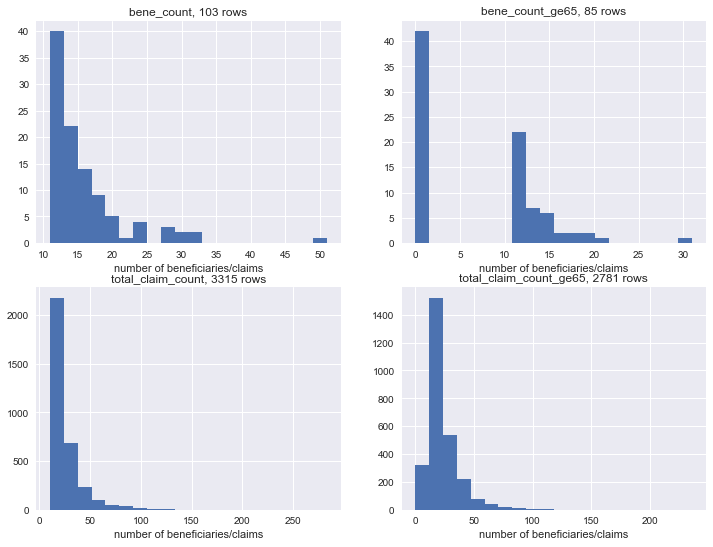

In [57]:
graphs = ['bene_count', 'bene_count_ge65', 'total_claim_count', 'total_claim_count_ge65']

fig = plt.figure(figsize=(12,9))

for i, graph in enumerate(graphs, 1):
    ax = fig.add_subplot(2,2,i)
    ax.hist(imbruvica[graph].dropna(), bins=20)
    count = imbruvica[graph].dropna().count()
    title = '{}, {} rows'.format(graph, count)
    ax.set_title(title)
    ax.set_xlabel('number of beneficiaries/claims')

plt.tight_layout;

In [ ]:
nppes_provider_last_org_name.1
nppes_provider_first_name.1

In [73]:
for col in imbruvica.columns:
    print(col)

npi
nppes_provider_last_org_name
nppes_provider_first_name
nppes_provider_city
nppes_provider_state
specialty_description
description_flag
drug_name
generic_name
bene_count
total_claim_count
total_30_day_fill_count
total_day_supply
total_drug_cost
bene_count_ge65
bene_count_ge65_suppress_flag
total_claim_count_ge65
ge65_suppress_flag
total_30_day_fill_count_ge65
total_day_supply_ge65
total_drug_cost_ge65
nppes_provider_mi
nppes_credentials
nppes_provider_gender
nppes_entity_code
nppes_provider_street1
nppes_provider_street2
nppes_provider_zip5
nppes_provider_zip4
nppes_provider_country
medicare_prvdr_enroll_status
brand_suppress_flag
brand_claim_count
brand_drug_cost
generic_suppress_flag
generic_claim_count
generic_drug_cost
other_suppress_flag
other_claim_count
other_drug_cost
mapd_suppress_flag
mapd_claim_count
mapd_drug_cost
pdp_suppress_flag
pdp_claim_count
pdp_drug_cost
lis_suppress_flag
lis_claim_count
lis_drug_cost
nonlis_suppress_flag
nonlis_claim_count
nonlis_drug_cost
opioid